In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from neuralforecast.utils import AirPassengersDF
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, RNN, LSTM

import warnings
warnings.filterwarnings("ignore")

import torch
torch.set_float32_matmul_precision('medium')

# data

In [39]:
# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds <= "1959-12-31"]
Y_test_df = Y_df[Y_df.ds > "1959-12-31"]

print(Y_df.shape)
print()
print(Y_df["unique_id"].value_counts())
print()
print(Y_train_df.shape)
print()
print(Y_test_df.shape)

(144, 3)

1.0    144
Name: unique_id, dtype: int64

(132, 3)

(12, 3)


In [8]:
Y_train_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


In [9]:
Y_test_df.head()

,unique_id,ds,y
132,1.0,1960-01-31,417.0
133,1.0,1960-02-29,391.0
134,1.0,1960-03-31,419.0
135,1.0,1960-04-30,461.0
136,1.0,1960-05-31,472.0


# model fit

In [46]:
# forecast length
horizon = len(Y_test_df)

# model
nf = NeuralForecast(
    models = [
        LSTM(h = horizon, max_steps = 500, scaler_type = "standard", encoder_hidden_size = 64, decoder_hidden_size = 64),
        NBEATS(input_size = 2 * horizon, h = horizon, max_steps = 50),
        NHITS(input_size = 2 * horizon, h = horizon, max_steps = 100, n_freq_downsample = [2, 1, 1]),
    ], 
    freq = "M"
)

# model training
nf.fit(df = Y_train_df)

Global seed set to 1
Global seed set to 1
Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | hist_encoder    | LSTM          | 50.4 K
4 | context_adapter | Linear        | 7.8 K 
5 | mlp_decoder     | MLP           | 769   
--------------------------------------------------
59.0 K    Trainable params
0         Non-trainable params
59.0 K    Total params
0.236     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
900       Non-trainable params
2.4 M     Total params
9.789     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.769     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.


# model predict

In [48]:
Y_hat_df = nf.predict().reset_index()
Y_hat_df

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

,unique_id,ds,LSTM,NBEATS,NHITS
0,1.0,1960-01-31,416.811829,426.281372,422.886108
1,1.0,1960-02-29,431.704224,448.993500,423.958923
2,1.0,1960-03-31,421.217896,458.734619,461.139557
3,1.0,1960-04-30,421.195374,459.096710,463.317047
4,1.0,1960-05-31,468.277161,506.186737,469.914642
5,1.0,1960-06-30,529.506714,576.391541,550.907471
6,1.0,1960-07-31,590.911011,631.492065,632.620544
7,1.0,1960-08-31,568.070312,627.483826,637.266968
8,1.0,1960-09-30,502.768005,555.302856,549.146606
9,1.0,1960-10-31,433.618286,482.730347,464.672546


# plot_predictions

In [49]:
# test and predictions data
Y_hat_df = Y_test_df.merge(Y_hat_df, how = "left", on = ["unique_id", "ds"])
Y_hat_df

,unique_id,ds,y,LSTM,NBEATS,NHITS
0,1.0,1960-01-31,417.0,416.811829,426.281372,422.886108
1,1.0,1960-02-29,391.0,431.704224,448.993500,423.958923
2,1.0,1960-03-31,419.0,421.217896,458.734619,461.139557
3,1.0,1960-04-30,461.0,421.195374,459.096710,463.317047
4,1.0,1960-05-31,472.0,468.277161,506.186737,469.914642
5,1.0,1960-06-30,535.0,529.506714,576.391541,550.907471
6,1.0,1960-07-31,622.0,590.911011,631.492065,632.620544
7,1.0,1960-08-31,606.0,568.070312,627.483826,637.266968
8,1.0,1960-09-30,508.0,502.768005,555.302856,549.146606
9,1.0,1960-10-31,461.0,433.618286,482.730347,464.672546


In [50]:
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index("ds")
plot_df

,unique_id,y,LSTM,NBEATS,NHITS
ds,,,,,
1949-01-31,1.0,112.0,NaN,NaN,NaN
1949-02-28,1.0,118.0,NaN,NaN,NaN
1949-03-31,1.0,132.0,NaN,NaN,NaN
1949-04-30,1.0,129.0,NaN,NaN,NaN
1949-05-31,1.0,121.0,NaN,NaN,NaN
...,...,...,...,...,...
1960-08-31,1.0,606.0,568.070312,627.483826,637.266968
1960-09-30,1.0,508.0,502.768005,555.302856,549.146606
1960-10-31,1.0,461.0,433.618286,482.730347,464.672546


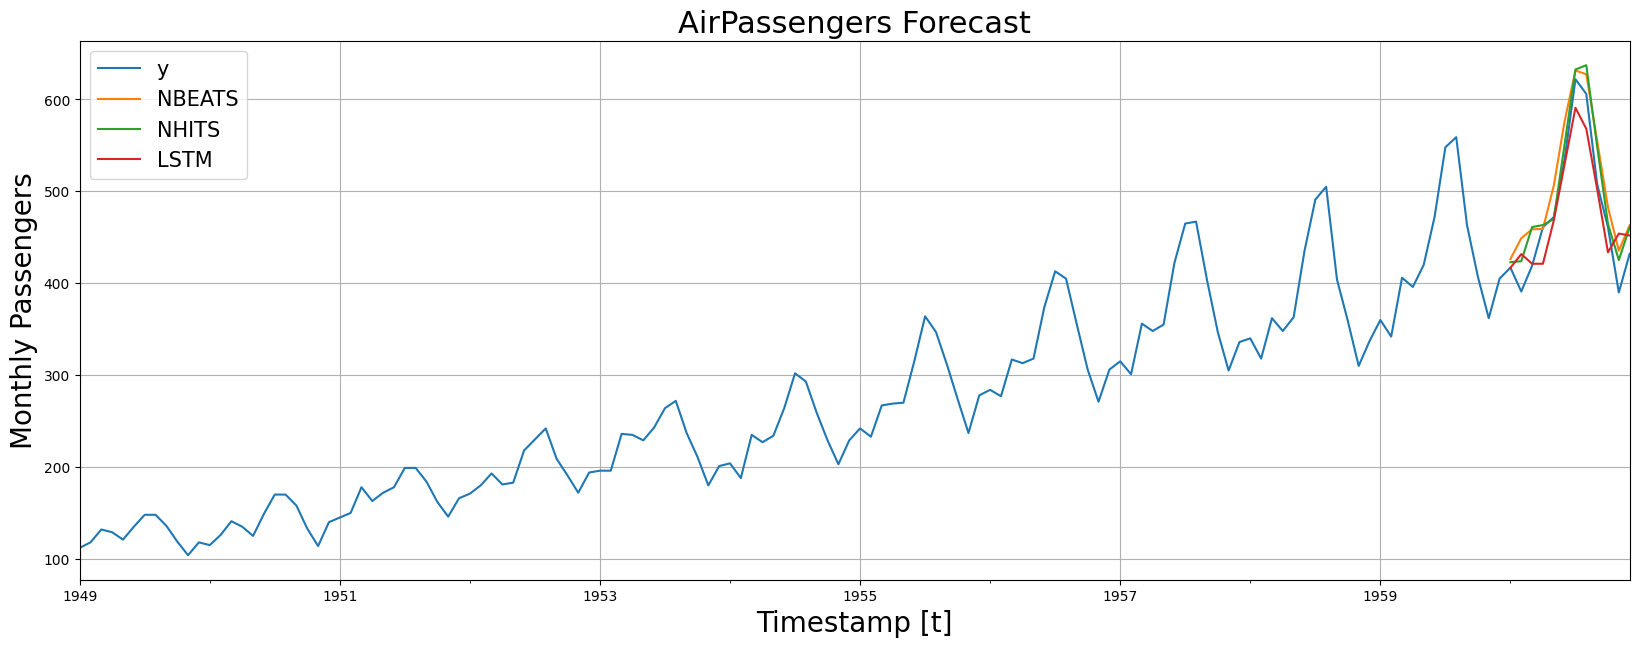

In [52]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df[["y", "NBEATS", "NHITS", "LSTM"]].plot(ax = ax, linewidth = 1.5)
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()